In [6]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()


In [7]:
stocksymbols = ['TATAMOTORS.NS']
startdate = date(2017,8,4)
end_date = date.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date,interval='1d'):
    data = yf.download(stocks,start=start,end=end,interval=interval)
    return data


2024-02-03


In [8]:
data = getMyPortfolio(stocksymbols)
data


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017
...,...,...,...,...,...,...
2024-01-29,811.849976,843.799988,811.049988,841.000000,841.000000,12823686
2024-01-30,843.000000,885.950012,842.849976,858.849976,858.849976,19734613
2024-01-31,865.200012,896.500000,865.200012,884.200012,884.200012,24562392


In [8]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [9]:
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data


C:\Users\91930\AppData\Local\Temp\ipykernel_2032\1077273166.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data['SMA 30'][i] > data['SMA 100'][i]:
C:\Users\91930\AppData\Local\Temp\ipykernel_2032\1077273166.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif data['SMA 30'][i] < data['SMA 100'][i]:
C:\Users\91930\AppData\Local\Temp\ipykernel_2032\1077273166.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  signalBuy

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04,435.100006,438.750000,433.450012,435.600006,434.246582,4166729,NaN,NaN,NaN,NaN
2017-08-07,438.600006,439.799988,425.299988,430.000000,428.663971,6461815,NaN,NaN,NaN,NaN
2017-08-08,432.000000,435.500000,426.000000,430.000000,428.663971,7134979,NaN,NaN,NaN,NaN
2017-08-09,428.799988,429.899994,415.000000,416.049988,414.757324,10849567,NaN,NaN,NaN,NaN
2017-08-10,401.000000,403.600006,375.250000,380.200012,379.018738,28114017,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-01-29,811.849976,843.799988,811.049988,841.000000,841.000000,12823686,782.168335,692.0790,NaN,NaN
2024-01-30,843.000000,885.950012,842.849976,858.849976,858.849976,19734613,786.383333,694.5555,NaN,NaN
2024-01-31,865.200012,896.500000,865.200012,884.200012,884.200012,24562392,791.496667,697.3075,NaN,NaN


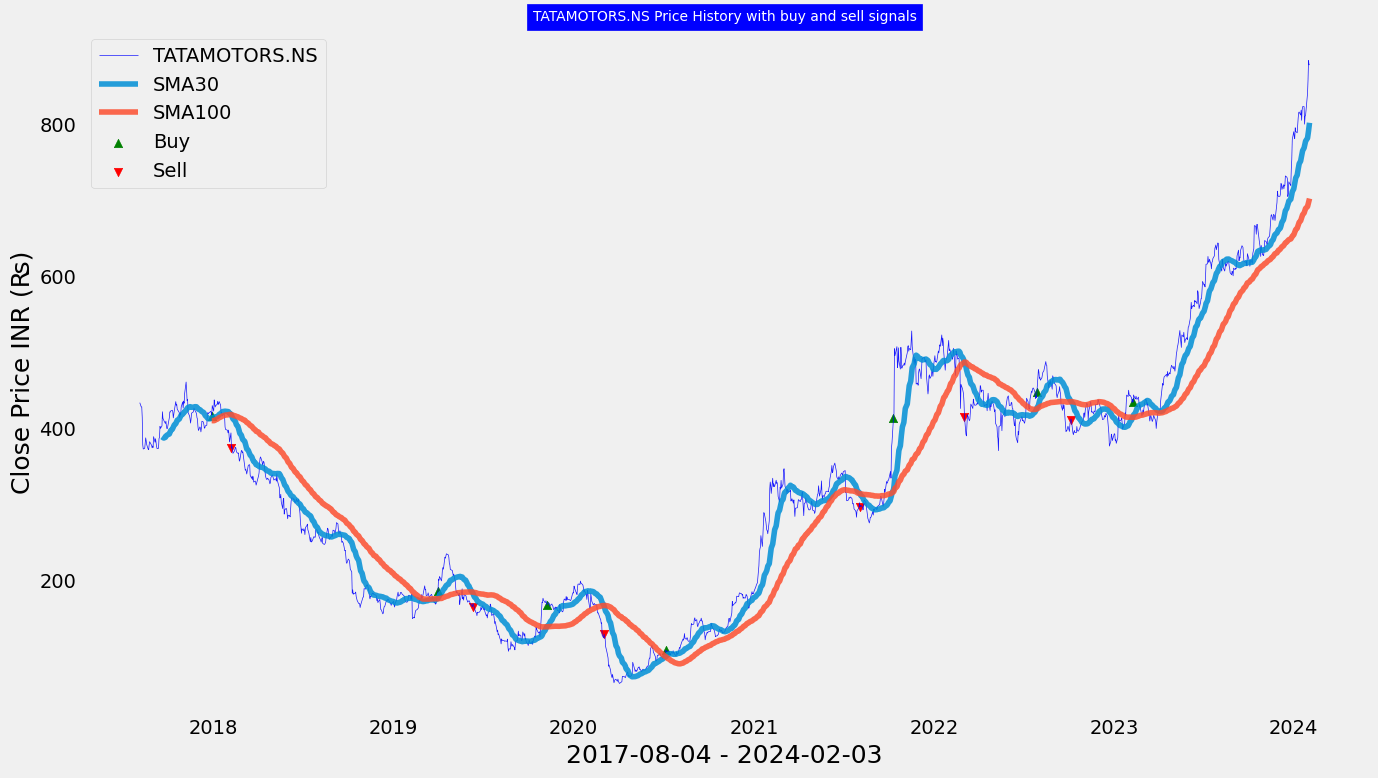

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


In [18]:
oneDay=getMyPortfolio(start='2024-02-01',end='2024-02-03',interval='5m')
oneDay.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-02-02 15:05:00+05:30,878.549988,880.349976,878.049988,879.250000,879.250000,242688
2024-02-02 15:10:00+05:30,879.500000,879.599976,877.299988,878.049988,878.049988,309300
2024-02-02 15:15:00+05:30,878.150024,879.299988,877.000000,877.200012,877.200012,388961
2024-02-02 15:20:00+05:30,877.200012,878.849976,876.900024,878.599976,878.599976,459426
2024-02-02 15:25:00+05:30,878.599976,883.299988,878.400024,878.750000,878.750000,401778


C:\Users\91930\AppData\Local\Temp\ipykernel_2032\1324850769.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


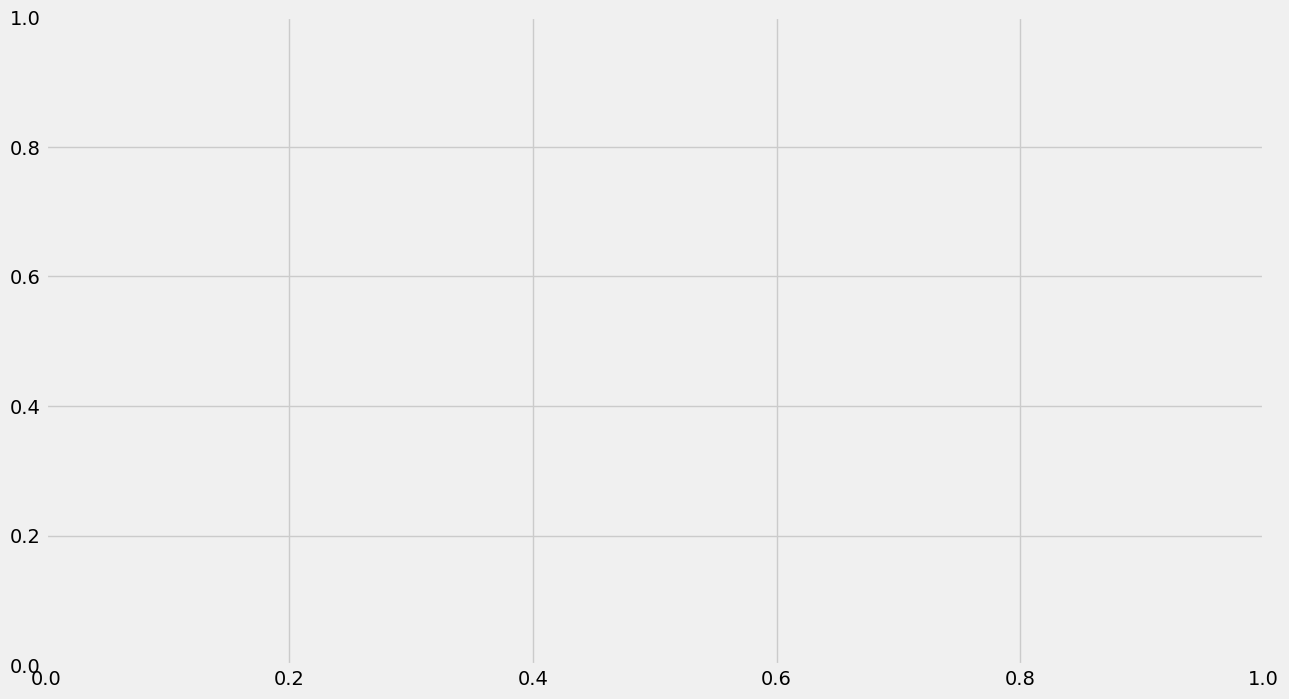

In [19]:
fig,ax=plt.subplots(figsize=(14,8))
fig.show()